In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-assignment-1/got1.txt
/kaggle/input/games-of-throne/got1.txt


In [17]:
!ls /kaggle/input


games-of-throne  nlp-assignment-1


In [18]:
!ls /kaggle/input


games-of-throne  nlp-assignment-1


In [19]:
!ls /kaggle/input/data-set-for-assignment-1


ls: cannot access '/kaggle/input/data-set-for-assignment-1': No such file or directory


In [20]:
with open('/kaggle/input/games-of-throne/got1.txt', 'r') as f:
    text = f.read()

print("Text Sample:\n", text[:500])


Text Sample:
 This edition contains the complete text of the original hardcover edition.

NOT ONE WORD HAS BEEN OMITTED.

A CLASH OF KINGS

A Bantam Spectra Book

PUBLISHING HISTORY

Bantam Spectra hardcover edition published February 1999

Bantam Spectra paperback edition / September 2000

SPECTRA and the portrayal of a boxed “s” are trademarks of Bantam Books, a division of Random House, Inc.

All rights reserved.

Copyright © 1999 by George R. R. Martin.

Maps by James Sinclair.

Heraldic crest by Virginia


In [21]:
# Step 1: Preprocessing
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

text = text.lower()  # lowercase
text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
tokens = word_tokenize(text)
print("Tokens:", tokens[:20])


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokens: ['this', 'edition', 'contains', 'the', 'complete', 'text', 'of', 'the', 'original', 'hardcover', 'edition', 'not', 'one', 'word', 'has', 'been', 'omitted', 'a', 'clash', 'of']


In [22]:
# Step 2: One-Hot Encoding
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
one_hot = lb.fit_transform(tokens)
print("\nOne-Hot Vocabulary:", lb.classes_[:10])
print("\nSample One-Hot Encoded Vectors:\n", one_hot[:5])



One-Hot Vocabulary: ['1999' '2000' '9780553897852' '9837954' 'a' 'aahooooooo' 'abandon'
 'abandoned' 'abandoning' 'abashed']

Sample One-Hot Encoded Vectors:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
# Step 3: Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer
text_data = [" ".join(tokens)]
cv = CountVectorizer()
bow_matrix = cv.fit_transform(text_data)
print("\nBoW Vocabulary:", cv.get_feature_names_out()[:10])
print("BoW Matrix Shape:", bow_matrix.shape)



BoW Vocabulary: ['1999' '2000' '9780553897852' '9837954' 'aahooooooo' 'abandon'
 'abandoned' 'abandoning' 'abashed' 'abed']
BoW Matrix Shape: (1, 13866)


In [24]:
# Step 4: N-Grams
cv_bigram = CountVectorizer(ngram_range=(2, 2))
bigrams = cv_bigram.fit_transform(text_data)

cv_trigram = CountVectorizer(ngram_range=(3, 3))
trigrams = cv_trigram.fit_transform(text_data)

print("\nSample Bigrams:", cv_bigram.get_feature_names_out()[:5])
print("Sample Trigrams:", cv_trigram.get_feature_names_out()[:5])



Sample Bigrams: ['1999 bantam' '1999 by' '2000 spectra' '9780553897852 v30_r1'
 '9837954 no']
Sample Trigrams: ['1999 bantam spectra' '1999 by george' '2000 spectra and'
 '9780553897852 v30_r1 contents' '9837954 no part']


In [25]:
# Step 5: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(text_data)
print("\nTF-IDF Vocabulary:", tfidf.get_feature_names_out()[:10])



TF-IDF Vocabulary: ['1999' '2000' '9780553897852' '9837954' 'aahooooooo' 'abandon'
 'abandoned' 'abandoning' 'abashed' 'abed']


In [26]:
# Step 6: Word2Vec using Gensim
from gensim.models import Word2Vec
sentences = sent_tokenize(" ".join(tokens))  # recreate sentences
word_tokens = [word_tokenize(sent) for sent in sentences]
model = Word2Vec(sentences=word_tokens, vector_size=50, window=3, min_count=1)
print("\nWord2Vec vector for 'king':\n", model.wv['king'])



Word2Vec vector for 'king':
 [ 0.01495636 -0.00323181 -0.00518204  0.00187538 -0.0554987  -0.08219969
  0.04996115  0.05001132 -0.11370604 -0.0780689   0.01442614 -0.03301113
  0.063852    0.01811796 -0.00036084  0.02616041  0.02998436  0.02018922
 -0.0527347  -0.02464858  0.0519443   0.04355234  0.10192846 -0.02231455
  0.03389327 -0.00615898 -0.00756101 -0.00168172 -0.03438861  0.01400289
 -0.00623262 -0.028987    0.02200657 -0.01023131 -0.04931732  0.02233436
  0.04554494 -0.01922195 -0.01160622 -0.00318352  0.03972983 -0.0044684
 -0.01544429 -0.0204649   0.09607451  0.03979244  0.01724108 -0.08846067
  0.02257094  0.03293493]


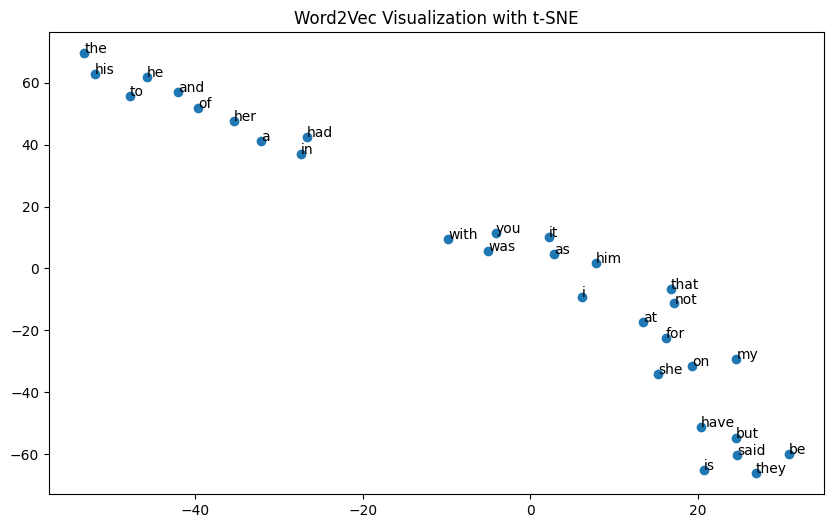

In [27]:
import numpy as np  # ADD THIS if not already imported

# Step 7: t-SNE Visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)[:30]
word_vectors = np.array([model.wv[w] for w in words])  # ✅ Fix here
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
Y = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(Y[:, 0], Y[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
plt.title("Word2Vec Visualization with t-SNE")
plt.show()


In [28]:
print("Hello Ahsan")


Hello Ahsan
